In [216]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
from matplotlib import colors 
from tensorflow import keras
from keras import layers
from keras.models import Sequential


In [217]:
#UNIVERSAL VARIABLES
train_images = [] 
image_dir = r'C:\Users\Miranda\OneDrive\Desktop\dog\Main\datas\images\Images'
image_height = 180 
image_width = 180 
batch_size = 32


In [224]:
#image processing 

train_dataset = tf.keras.utils.image_dataset_from_directory(directory=image_dir,
labels='inferred', label_mode='categorical', batch_size=batch_size, 
    image_size=(image_height,image_width), seed=123, validation_split=0.2, subset='training')

test_dataset = tf.keras.utils.image_dataset_from_directory(directory=image_dir,
labels='inferred', label_mode='categorical',batch_size=batch_size, 
    image_size=(image_height,image_width), seed=123, validation_split=0.2, subset='validation')

class_names = train_dataset.class_names
print(class_names)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.
Found 20580 files belonging to 120 classes.
Using 4116 files for validation.
['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Bor

In [233]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [234]:
normalization_layer = layers.Rescaling(1./255)

num_classes = len(class_names)

data_augmentation = keras.Sequential([layers.RandomFlip('horizontal', input_shape=(image_height,image_width, 3)),
  layers.RandomRotation(0.1), layers.RandomZoom(0.1)])

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name='outputs')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs=10

history = model.fit(
  train_dataset,
  validation_data=test_dataset,
  epochs=epochs
)



Epoch 1/10
515/515 [==============================] - 166s 317ms/step - loss: 8.1099 - accuracy: 0.0077 - val_loss: 7.9972 - val_accuracy: 0.0058
Epoch 2/10
515/515 [==============================] - 161s 312ms/step - loss: 8.0721 - accuracy: 0.0077 - val_loss: 8.1256 - val_accuracy: 0.0058
Epoch 3/10
515/515 [==============================] - 160s 311ms/step - loss: 8.1663 - accuracy: 0.0077 - val_loss: 7.9926 - val_accuracy: 0.0058
Epoch 4/10
515/515 [==============================] - 160s 312ms/step - loss: 8.1728 - accuracy: 0.0077 - val_loss: 8.1256 - val_accuracy: 0.0058
Epoch 5/10
515/515 [==============================] - 160s 311ms/step - loss: 8.1521 - accuracy: 0.0077 - val_loss: 8.1256 - val_accuracy: 0.0058
Epoch 6/10
515/515 [==============================] - 160s 310ms/step - loss: 8.1511 - accuracy: 0.0077 - val_loss: 8.1256 - val_accuracy: 0.0058
Epoch 7/10
515/515 [==============================] - 161s 312ms/step - loss: 8.1521 - accuracy: 0.0077 - val_loss: 8.1256 -

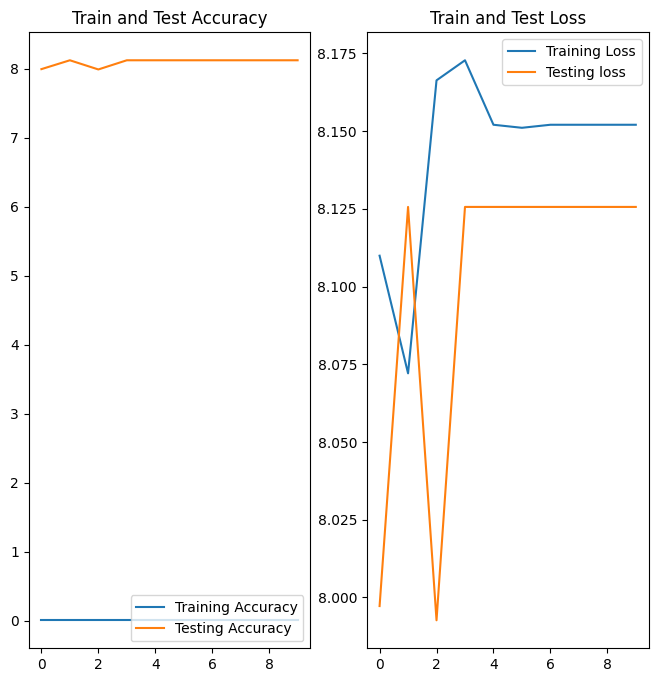

In [236]:
train_acc = history.history['accuracy']
test_acc = history.history['val_loss']

train_loss = history.history['loss']
test_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Testing Accuracy')
plt.legend(loc='lower right')
plt.title("Train and Test Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Testing loss')
plt.legend(loc='upper right')
plt.title("Train and Test Loss")
plt.show()